In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import strftime
from imblearn.under_sampling import RandomUnderSampler

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [4]:
len(train_data)

4542343

In [5]:
train_data.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL      

In [6]:
# train_data.drop(["FLT_ATTENDANTS_PER_PASS", "GROUND_SERV_PER_PASS"], axis=1, inplace=True)

In [7]:

train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [8]:
train_data["CARRIER_NAME"].unique()

array(['American Airlines Inc.', 'SkyWest Airlines Inc.',
       'American Eagle Airlines Inc.', 'Southwest Airlines Co.',
       'JetBlue Airways', 'United Air Lines Inc.', 'Alaska Airlines Inc.',
       'Atlantic Southeast Airlines', 'Delta Air Lines Inc.',
       'Midwest Airline, Inc.', 'Comair Inc.', 'Endeavor Air Inc.',
       'Frontier Airlines Inc.', 'Spirit Air Lines', 'Mesa Airlines Inc.',
       'Allegiant Air', 'Hawaiian Airlines Inc.'], dtype=object)

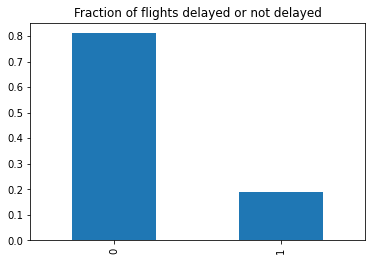

In [9]:
train_data["DEP_DEL15"].value_counts(normalize =True).plot(kind="bar", title ="Fraction of flights delayed or not delayed");

In [10]:
carrier_delay = pd.crosstab(train_data["CARRIER_NAME"],train_data["DEP_DEL15"] )

In [11]:
carrier_delay["Percentage_Delay"] = carrier_delay[1] /(carrier_delay[0] + carrier_delay[1]) *100

In [12]:
carrier_delay.sort_values("Percentage_Delay", ascending=False, inplace=True)

In [13]:
top_5_carrier_flight_delay = carrier_delay.head()
bottom_5_carrier_flight_delay = carrier_delay.tail()

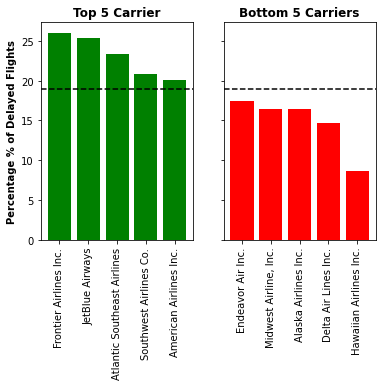

In [14]:
fig, (ax, ax1) = plt.subplots(1, 2, sharey=True)
ax.bar(top_5_carrier_flight_delay.index, top_5_carrier_flight_delay["Percentage_Delay"], color='green')
ax.set_title('Top 5 Carrier', fontweight="bold")
ax.set_ylabel('Percentage % of Delayed Flights', fontweight="bold")
ax.tick_params(axis='x', rotation=90)
mean_percentage_of_flights_delay = np.mean(carrier_delay["Percentage_Delay"])
ax.axhline(mean_percentage_of_flights_delay, color="black", linestyle="--")

ax1.bar(bottom_5_carrier_flight_delay.index, bottom_5_carrier_flight_delay["Percentage_Delay"], color='red')
ax1.set_title('Bottom 5 Carriers', fontweight="bold")
ax1.tick_params(axis='x', rotation=90)
ax1.axhline(mean_percentage_of_flights_delay, color="black", linestyle="--");


In [15]:
len(train_data)

4542343

In [16]:
sampled_data = train_data.sample(200)

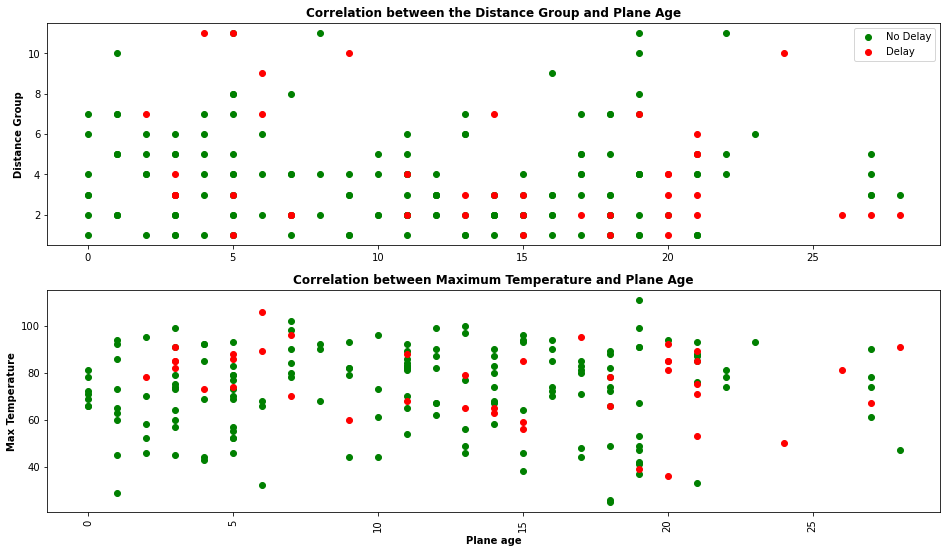

In [17]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=[16,9])
ax.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==0],sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==0],  color='green')
ax.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==1],sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==1],  color='red')
ax.legend(["No Delay", "Delay"])
ax.set_title('Correlation between the Distance Group and Plane Age', fontweight="bold")
ax.set_ylabel('Distance Group', fontweight="bold")

ax1.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==0],sampled_data.TMAX[sampled_data["DEP_DEL15"]==0],  color='green')
ax1.scatter(sampled_data.PLANE_AGE[sampled_data["DEP_DEL15"]==1],sampled_data.TMAX[sampled_data["DEP_DEL15"]==1],  color='red')
ax1.set_title('Correlation between Maximum Temperature and Plane Age', fontweight="bold")
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Max Temperature', fontweight="bold")
ax1.set_xlabel('Plane age', fontweight="bold")
plt.savefig("age");

In [18]:
train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [19]:
train_data[["MONTH", "DAY_OF_WEEK"]] = train_data[["MONTH", "DAY_OF_WEEK"]].astype(str)

In [20]:
train_data["DATE"] = pd.to_datetime(train_data["MONTH"] + "/" + train_data["DAY_OF_WEEK"] + "/" + "2019", format="%m/%d/%Y")

In [21]:
train_data["DATE"].dt.quarter

0          3
1          2
2          4
3          1
4          3
          ..
4542338    2
4542339    2
4542340    2
4542341    4
4542342    2
Name: DATE, Length: 4542343, dtype: int64

In [22]:
train_data["DAY_NAME"] = train_data["DATE"].dt.day_name()
train_data["MONTH_NAME"] = train_data["DATE"].dt.month_name()
train_data["QUARTER"] = train_data["DATE"].dt.quarter

In [23]:
train_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DATE,DAY_NAME,MONTH_NAME,QUARTER
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,95.0,4.25,0.237709,0.273236,0.222538,0.255479,2019-07-07,Sunday,July,3
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,71.0,11.41,0.154651,0.121849,0.237972,0.197503,2019-04-01,Monday,April,2
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,54.0,0.45,0.117559,0.187867,0.139886,0.060327,2019-11-04,Monday,November,4
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,64.0,8.05,0.204389,0.141446,0.132868,0.202037,2019-03-02,Saturday,March,1
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,94.0,10.51,0.203263,0.193761,0.203027,0.113050,2019-07-03,Wednesday,July,3


In [24]:
train_data.drop(["MONTH","DAY_OF_WEEK", "SEGMENT_NUMBER"], axis=1, inplace=True)

In [25]:
train_data.head()

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DATE,DAY_NAME,MONTH_NAME,QUARTER
0,0,1500-1559,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,...,95.0,4.25,0.237709,0.273236,0.222538,0.255479,2019-07-07,Sunday,July,3
1,0,1300-1359,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,...,71.0,11.41,0.154651,0.121849,0.237972,0.197503,2019-04-01,Monday,April,2
2,0,0001-0559,2,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,...,54.0,0.45,0.117559,0.187867,0.139886,0.060327,2019-11-04,Monday,November,4
3,0,1500-1559,7,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,...,64.0,8.05,0.204389,0.141446,0.132868,0.202037,2019-03-02,Saturday,March,1
4,0,0800-0859,1,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,...,94.0,10.51,0.203263,0.193761,0.203027,0.113050,2019-07-03,Wednesday,July,3


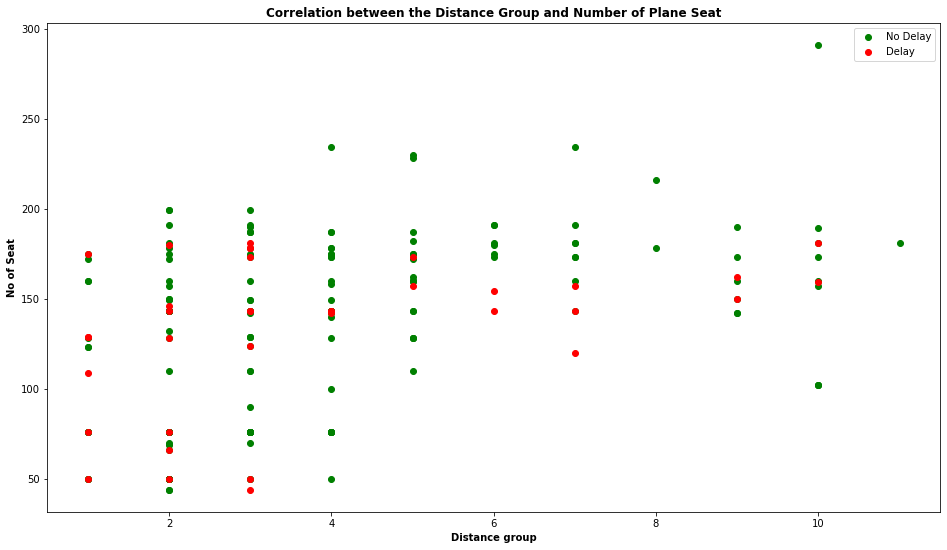

In [26]:
fig, ax = plt.subplots(1, 1, figsize=[16,9])
ax.scatter(sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==0],sampled_data.NUMBER_OF_SEATS[sampled_data["DEP_DEL15"]==0],  color='green')
ax.scatter(sampled_data.DISTANCE_GROUP[sampled_data["DEP_DEL15"]==1],sampled_data.NUMBER_OF_SEATS[sampled_data["DEP_DEL15"]==1],  color='red')
ax.legend(["No Delay", "Delay"])
ax.set_title('Correlation between the Distance Group and Number of Plane Seat', fontweight="bold")
ax.set_ylabel('No of Seat', fontweight="bold")
ax.set_xlabel('Distance group', fontweight="bold");

In [27]:
month_series_delay = pd.crosstab(train_data["DATE"].dt.month, train_data["DEP_DEL15"])
day_series_delay = pd.crosstab(train_data["DATE"].dt.day, train_data["DEP_DEL15"])

In [28]:
month_series_delay["Percentage_Delay"] = month_series_delay[1] /(month_series_delay[0] + month_series_delay[1]) *100
day_series_delay["Percentage_Delay"] = day_series_delay[1] /(day_series_delay[0] + day_series_delay[1]) *100

In [29]:
month_series_delay['Month']=month_series_delay.index
day_series_delay['Day'] = day_series_delay.index

In [30]:
day_series_delay

DEP_DEL15,0,1,Percentage_Delay,Day
DATE,,,,
1,542934,133881,19.781033,1
2,546765,115574,17.449373,2
3,537912,118281,18.025337,3
4,531339,137807,20.594459,4
5,543384,135511,19.960524,5
6,459505,93421,16.895751,6
7,521346,124683,19.299908,7


In [31]:
import calendar
month_series_delay['Month'] = month_series_delay['Month'].apply(lambda x: calendar.month_name[x])

In [32]:
day_series_delay['Day'] = day_series_delay['Day'].apply(lambda x: calendar.day_name[x-1])

In [33]:
month_series_delay

DEP_DEL15,0,1,Percentage_Delay,Month
DATE,,,,
1,290052,61338,17.455818,January
2,247247,68538,21.704007,February
3,319931,67574,17.438227,March
4,304691,69109,18.488229,April
5,310867,79612,20.388292,May
6,294963,94849,24.331986,June
7,318941,86043,21.246025,July
8,322476,83617,20.590604,August
9,319605,51116,13.788267,September


In [34]:
day_series_delay

DEP_DEL15,0,1,Percentage_Delay,Day
DATE,,,,
1,542934,133881,19.781033,Monday
2,546765,115574,17.449373,Tuesday
3,537912,118281,18.025337,Wednesday
4,531339,137807,20.594459,Thursday
5,543384,135511,19.960524,Friday
6,459505,93421,16.895751,Saturday
7,521346,124683,19.299908,Sunday


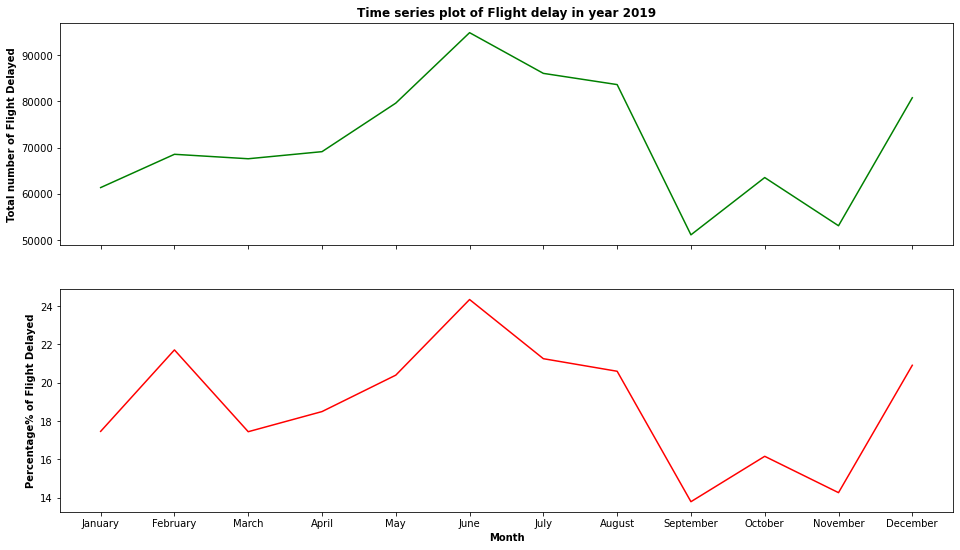

In [35]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=[16,9], sharex=True)
ax.plot(month_series_delay["Month"], month_series_delay[1],  color='green')
ax1.plot(month_series_delay["Month"], month_series_delay["Percentage_Delay"],  color='red')
ax.set_title('Time series plot of Flight delay in year 2019', fontweight="bold")
ax.set_ylabel('Total number of Flight Delayed', fontweight="bold")
ax1.set_ylabel('Percentage% of Flight Delayed', fontweight="bold")
ax1.set_xlabel('Month', fontweight="bold");

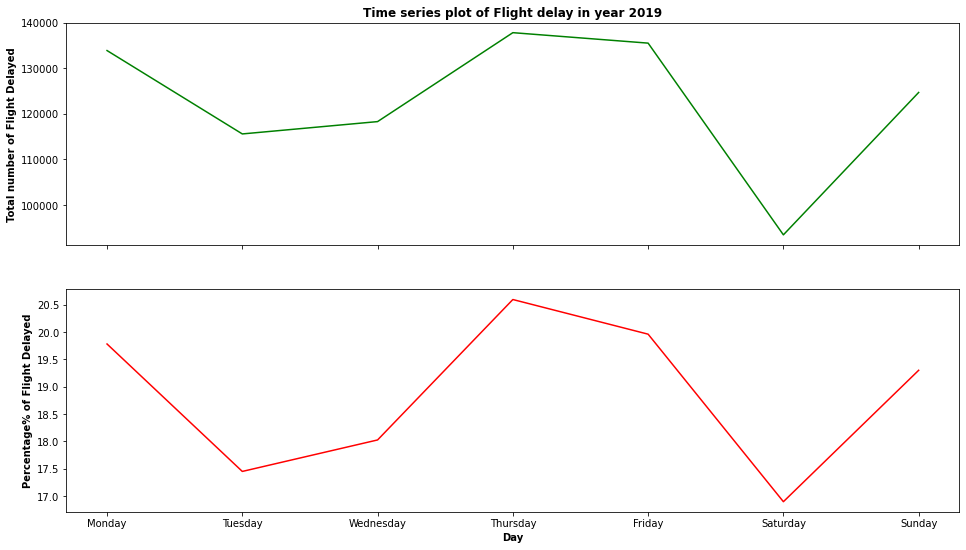

In [36]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=[16,9], sharex=True)
ax.plot(day_series_delay["Day"], day_series_delay[1],  color='green')
ax1.plot(day_series_delay["Day"], day_series_delay["Percentage_Delay"],  color='red')
ax.set_title('Time series plot of Flight delay in year 2019', fontweight="bold")
ax.set_ylabel('Total number of Flight Delayed', fontweight="bold")
ax1.set_ylabel('Percentage% of Flight Delayed', fontweight="bold")
ax1.set_xlabel('Day', fontweight="bold");

In [37]:
train_data.head()

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DATE,DAY_NAME,MONTH_NAME,QUARTER
0,0,1500-1559,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,...,95.0,4.25,0.237709,0.273236,0.222538,0.255479,2019-07-07,Sunday,July,3
1,0,1300-1359,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,...,71.0,11.41,0.154651,0.121849,0.237972,0.197503,2019-04-01,Monday,April,2
2,0,0001-0559,2,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,...,54.0,0.45,0.117559,0.187867,0.139886,0.060327,2019-11-04,Monday,November,4
3,0,1500-1559,7,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,...,64.0,8.05,0.204389,0.141446,0.132868,0.202037,2019-03-02,Saturday,March,1
4,0,0800-0859,1,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,...,94.0,10.51,0.203263,0.193761,0.203027,0.113050,2019-07-03,Wednesday,July,3


In [38]:
train_data["DEP_TIME_BLK"].unique()

array(['1500-1559', '1300-1359', '0001-0559', '0800-0859', '0700-0759',
       '1900-1959', '2000-2059', '1200-1259', '1100-1159', '1400-1459',
       '1000-1059', '1700-1759', '1600-1659', '2200-2259', '0900-0959',
       '0600-0659', '1800-1859', '2100-2159', '2300-2359'], dtype=object)

In [39]:
quarter_series = pd.crosstab(train_data["QUARTER"], train_data["DEP_DEL15"])
quarter_series["Percentage_Delay"] = quarter_series[1] /(quarter_series[0] + quarter_series[1]) *100

In [40]:
quarter_series

DEP_DEL15,0,1,Percentage_Delay
QUARTER,,,
1,857230,197450,18.721318
2,910521,243570,21.104922
3,961022,220776,18.681365
4,954412,197362,17.135480


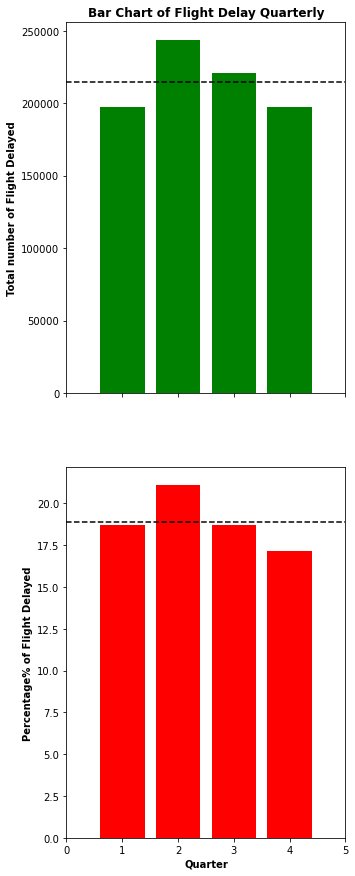

In [41]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(5,15))
ax.bar(quarter_series.index, quarter_series[1],  color='green')
mean_flights_delay = np.mean(quarter_series[1])
ax.axhline(mean_flights_delay, color="black", linestyle="--")

ax1.bar(quarter_series.index, quarter_series["Percentage_Delay"],  color='red')
mean_percentage_of_flights_delay = np.mean(quarter_series["Percentage_Delay"])
ax1.axhline(mean_percentage_of_flights_delay, color="black", linestyle="--")

ax.set_title('Bar Chart of Flight Delay Quarterly', fontweight="bold")
ax.set_ylabel('Total number of Flight Delayed', fontweight="bold")
ax1.set_ylabel('Percentage% of Flight Delayed', fontweight="bold")
ax1.set_xlabel('Quarter', fontweight="bold")
ax1.set_xlim(0,5);

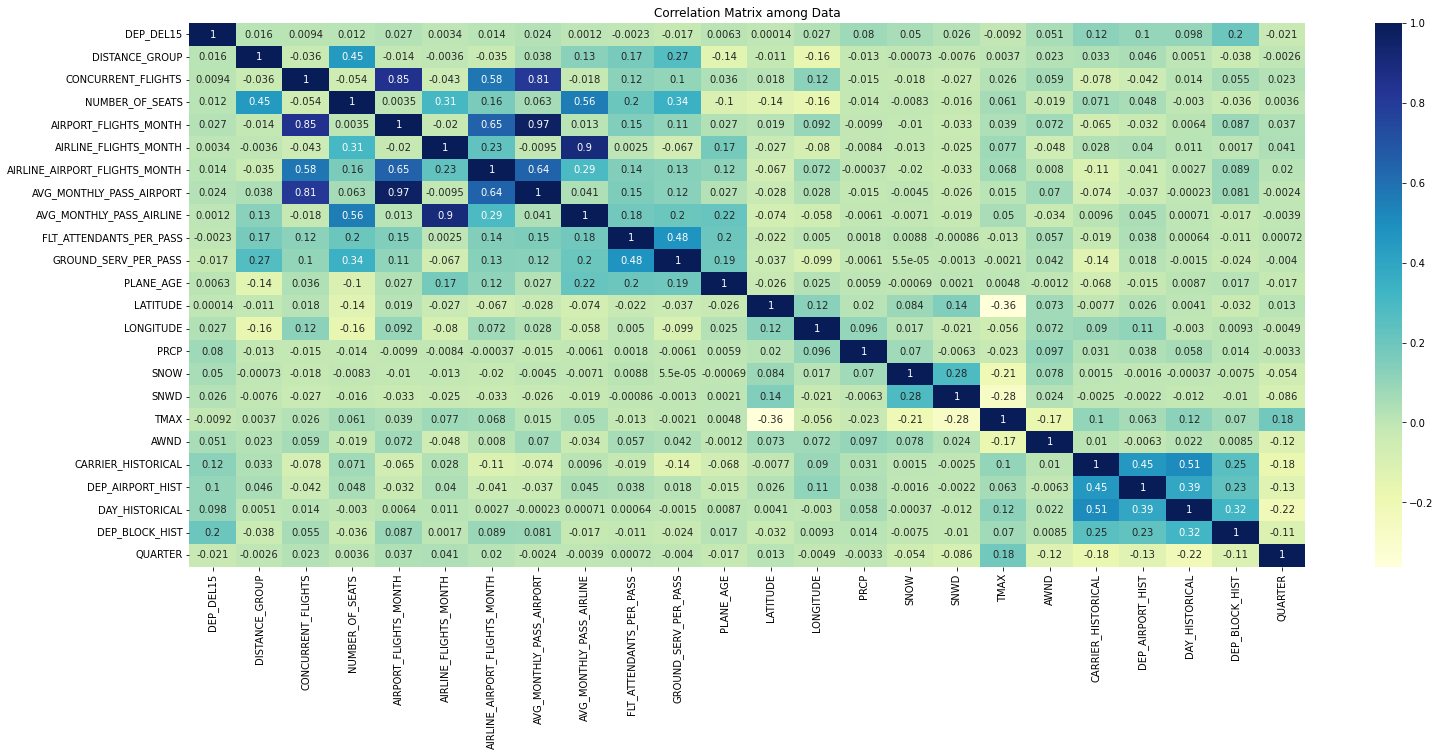

In [42]:
corr_matrix= train_data.corr()
fig,ax=plt.subplots(figsize=(25,10))
ax= sns.heatmap(corr_matrix, annot=True,cmap='YlGnBu');
plt.title('Correlation Matrix among Data');

In [43]:
train_data['DEP_DEL15'].corr(train_data['CONCURRENT_FLIGHTS'])

0.009380253877234368

In [44]:
for label, content in train_data.items():
    if pd.api.types.is_string_dtype(content):
        train_data[label]=content.astype('category').cat.as_ordered()
        train_data[label] = train_data[label].cat.codes

In [45]:
# train_data["DEP_TIME_BLK"].cat.codes.unique()

In [46]:
train_data.head()

,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DATE,DAY_NAME,MONTH_NAME,QUARTER
0,0,10,3,26,160,2,19534,79247,7972,2006675,...,95.0,4.25,0.237709,0.273236,0.222538,0.255479,2019-07-07,3,5,3
1,0,8,4,63,50,13,18788,67082,3655,2743323,...,71.0,11.41,0.154651,0.121849,0.237972,0.197503,2019-04-01,1,0,2
2,0,0,2,3,76,3,1148,25517,300,90547,...,54.0,0.45,0.117559,0.187867,0.139886,0.060327,2019-11-04,1,9,4
3,0,10,7,14,143,14,7612,114119,3282,1023434,...,64.0,8.05,0.204389,0.141446,0.132868,0.202037,2019-03-02,2,7,1
4,0,3,1,85,50,3,29376,28267,6058,3103410,...,94.0,10.51,0.203263,0.193761,0.203027,0.113050,2019-07-03,6,5,3


In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
model ={'Logistic Regression': LogisticRegression(),
       'KNN': KNeighborsClassifier(),
       'Random Forest': RandomForestClassifier(),
       'SVM' : svm.SVC(),
        'XGBClassifier' : XGBClassifier(),
       'MLPClassifier' : MLPClassifier(),
       'GradientBoostingClassifier' : GradientBoostingClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542343 entries, 0 to 4542342
Data columns (total 31 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   DEP_DEL15                      int64         
 1   DEP_TIME_BLK                   int8          
 2   DISTANCE_GROUP                 int64         
 3   CONCURRENT_FLIGHTS             int64         
 4   NUMBER_OF_SEATS                int64         
 5   CARRIER_NAME                   int8          
 6   AIRPORT_FLIGHTS_MONTH          int64         
 7   AIRLINE_FLIGHTS_MONTH          int64         
 8   AIRLINE_AIRPORT_FLIGHTS_MONTH  int64         
 9   AVG_MONTHLY_PASS_AIRPORT       int64         
 10  AVG_MONTHLY_PASS_AIRLINE       int64         
 11  FLT_ATTENDANTS_PER_PASS        float64       
 12  GROUND_SERV_PER_PASS           float64       
 13  PLANE_AGE                      int64         
 14  DEPARTING_AIRPORT              int8          
 15  LATITUDE       

In [88]:
model_data = train_data[["DEP_DEL15", "MONTH_NAME", "DAY_NAME", "CARRIER_NAME", "DEPARTING_AIRPORT", "PREVIOUS_AIRPORT"]]

In [89]:
model_data["DEP_DEL15"].value_counts()

0    3683185
1     859158
Name: DEP_DEL15, dtype: int64

In [90]:
# model_data["DEP_DEL15"].value_counts()

In [91]:
# model_data=train_data.drop("DATE", axis=1)

In [92]:
X = model_data.drop(['DEP_DEL15'], axis=1)
y = model_data["DEP_DEL15"]

In [141]:
rus = RandomUnderSampler(sampling_strategy=0.7) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

In [142]:
y_res.value_counts()

0    1227368
1     859158
Name: DEP_DEL15, dtype: int64

In [95]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

In [96]:
# model_scores = fit_and_score(model, X_train, X_test , y_train, y_test)

In [97]:
model_scores

NameError: name 'model_scores' is not defined

In [98]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();
model_compare

NameError: name 'model_scores' is not defined

In [99]:
def cross_score(models, X, y, scoring:str):
    model_scores={}
    for name, model in models.items():
        score = cross_val_score(model, X, y, cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1), scoring=scoring)
        model_scores[name] = np.mean(score)
    return model_scores

In [ ]:
n_estimators = 300
learning_rate = 0.01
early_stopping_rounds = 15

In [100]:
# cross_score(model, X, y, "accuracy")

In [143]:
algo = XGBClassifier(n_estimators = 300, learning_rate = 0.01)
algo.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
# "colsample_bytree":[0.5, 0.75, 1],
# "max_depth":[2, 6, 12],
# "min_child_weight":[1,5,15],
# "learning_rate":[0.3, 0.1, 0.03],
# "n_estimators":[100, 300, 500]}

In [137]:
# #Initialise XGBoost Model
# model = XGBClassifier(n_jobs=-1)
# """Initialise Grid Search Model to inherit from the XGBoost Model,
# set the of cross validations to 3 per combination and use accuracy
# to score the models."""
# model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
# eval_set = [(X_train, y_train),(X_test,y_test)]
# #Fit the model as done previously
# model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)
# print(model_gs.best_params_)

In [150]:
y_pred = algo.predict(X_test)

In [18]:
plot_confusion_matrix(algo, X_test, y_test, normalize='true');

NameError: name 'plot_confusion_matrix' is not defined

In [152]:
recall_score(y_test,y_pred)

0.5315176678958219

In [153]:
precision_score(y_test,y_pred)

0.5754468467675516

In [154]:
accuracy_score(y_test,y_pred)

0.5914499002084046

In [68]:
def get_models():
    scores = dict()
    trees = [10, 50, 100, 500, 1000, 5000]
    for n in trees:
        model= XGBClassifier(n_estimators=n)
        model.fit(X_train, y_train)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores[str(n)] = np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
    return scores

In [69]:
get_models()

{'10': 0.8096730769230768,
 '50': 0.8084358974358974,
 '100': 0.8062371794871797,
 '500': 0.7889423076923077,
 '1000': 0.7750833333333332,
 '5000': 0.741173076923077}

In [70]:
cross_val_score(algo, X, y, cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1), scoring='accuracy')

array([0.80596154, 0.8075    , 0.80826923, 0.80730769, 0.805     ,
       0.80461538, 0.8075    , 0.80711538, 0.80673077, 0.80596154,
       0.80423077, 0.80807692, 0.80769231, 0.80519231, 0.80442308,
       0.80538462, 0.80557692, 0.80692308, 0.80692308, 0.80519231,
       0.80634615, 0.80884615, 0.80365385, 0.80692308, 0.80423077,
       0.80653846, 0.80634615, 0.80461538, 0.80788462, 0.80615385])

In [71]:
cross_score(model, X, y, "precision")

C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gbeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

{'Logistic Regression': 0.0,
 'KNN': 0.24597573447970553,
 'Random Forest': 0.25000752456594727,
 'SVM': 0.0,
 'XGBClassifier': 0.2961401559598746,
 'MLPClassifier': 0.1963718820861678,
 'GradientBoostingClassifier': 0.23333333333333334}

In [72]:
cross_score(model, X, y, "f1")

{'Logistic Regression': 0.0,
 'KNN': 0.12508574964219815,
 'Random Forest': 0.1293843720887171,
 'SVM': 0.0,
 'XGBClassifier': 0.02513513576542373,
 'MLPClassifier': 0.00397829565341849,
 'GradientBoostingClassifier': 0.0005383809175596552}